# Linear Regression

Exploration of simple linear regression based on Portugese white wine data

Reference: Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties, Decision Support Systems, Elsevier, 47(4):547-553, 2009

Description: The data set contains information on 4989 wines. For each wine 11 features (columns) are recorded. The final columns contains the quality of the wine, which corresponds to the target variable.

Possible predictors:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Target variable: quality

## Getting the data

In [11]:
import os
import pandas as pd
import numpy as np

# set the path to the data
csv_path = r"winequality-white.csv"
data = pd.read_csv(csv_path, delimiter=";")

## Have a look at the data structure

In [12]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [13]:
data.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [14]:
print("data shape:", data.shape)

data shape: (4898, 12)


In [15]:
# Split the data into train and test sets

data_np = data.values # transform to numpy array

np.random.shuffle(data_np) # randomly shaffle data

# use first 3000 examples for training
X_train = data_np[:3000,:11] # predictors
y_train = data_np[:3000,11]  # target variable

# and remaining examples for testing
X_test = data_np[3000:,:11] # predictors
y_test = data_np[3000:,11] # target variable

In [16]:
print("shape of train data:", X_train.shape) 
print("shape of test data:", X_test.shape)

shape of train data: (3000, 11)
shape of test data: (1898, 11)


In [17]:
print("length of targets in train data:", y_train.shape[0]) 
print("length of targets in test data:", y_test.shape[0])

length of targets in train data: 3000
length of targets in test data: 1898


## Tasks

Make some plots of the data in order to understand them better. Use the function **plt.hist()** of the package matplotlib to visualize the distribution of each of the predictors for the training data. Plot scatter lots of each feature and the target variable, using the function **plt.scatter()**. Also calculate the amount of correlation (correlation coefficient) between each predictor and the target variable, using the function **np.corrcoef()** of numpy. Which variable seems to have more predictive power?

Feature: fixed acidity
Correlation coefficient: -0.10536637901220758


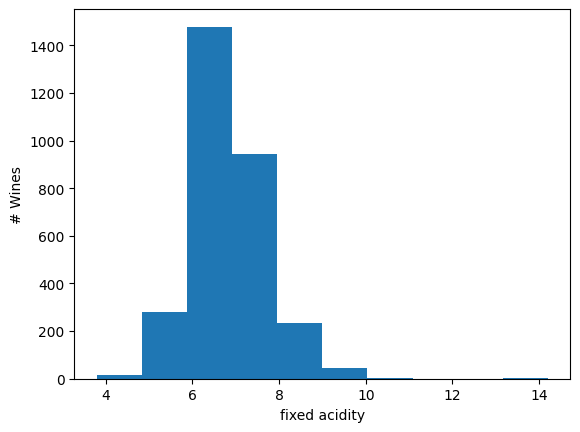

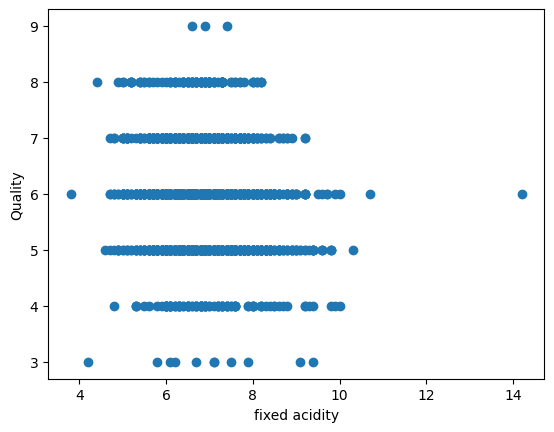

Feature: volatile acidity
Correlation coefficient: -0.20999730440999934


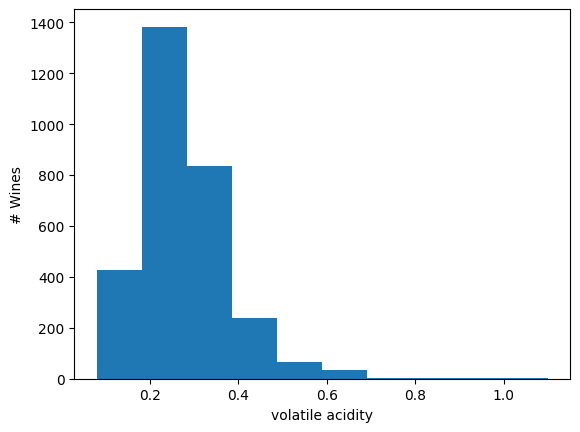

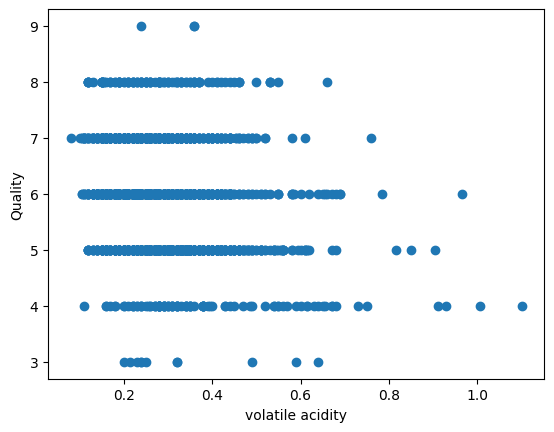

Feature: citric acid
Correlation coefficient: 0.01585995106085314


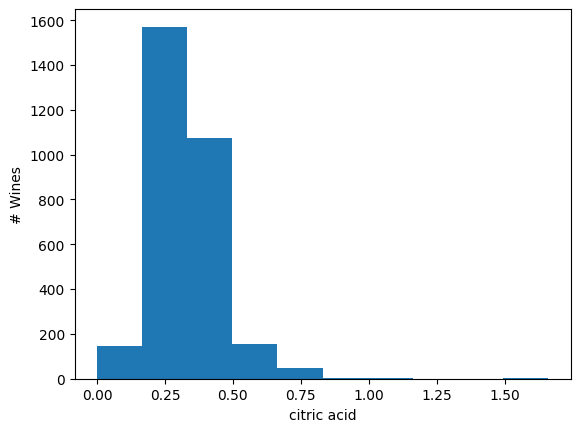

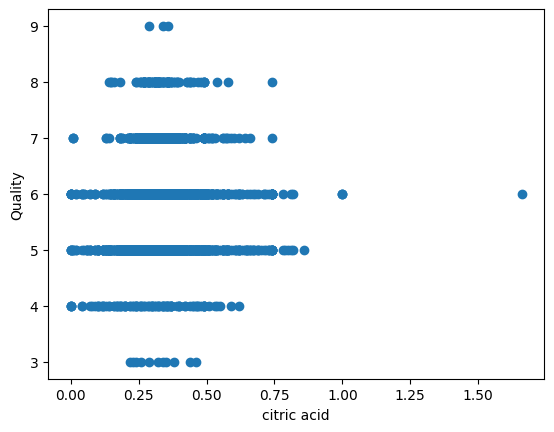

Feature: residual sugar
Correlation coefficient: -0.09479318636631248


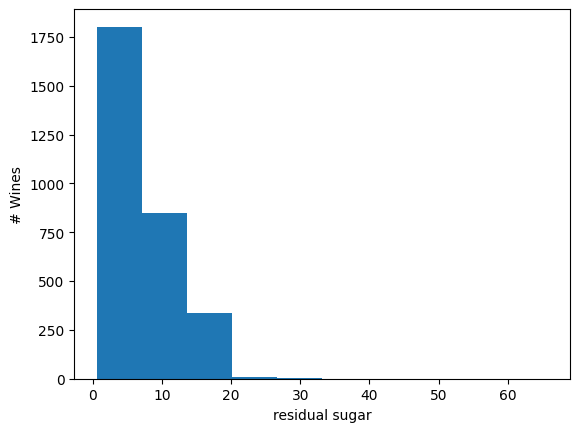

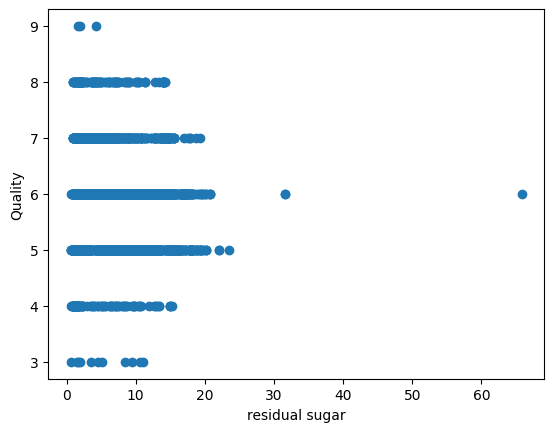

Feature: chlorides
Correlation coefficient: -0.2300497068889614


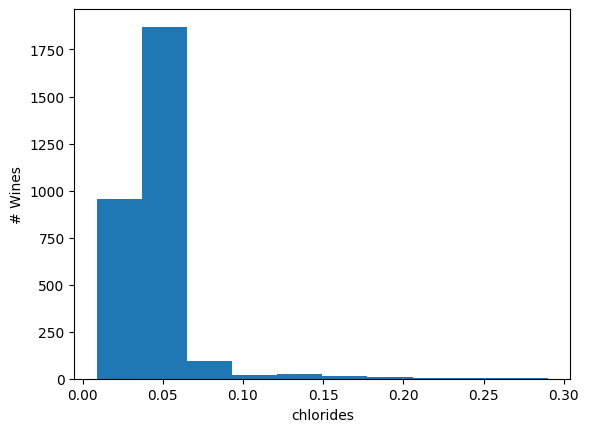

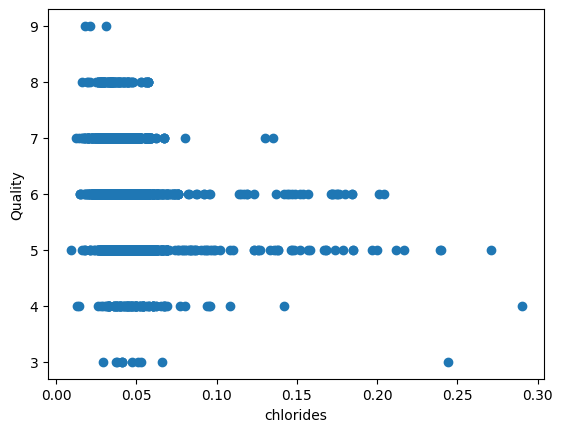

Feature: free sulfur dioxide
Correlation coefficient: 0.0006241032851511152


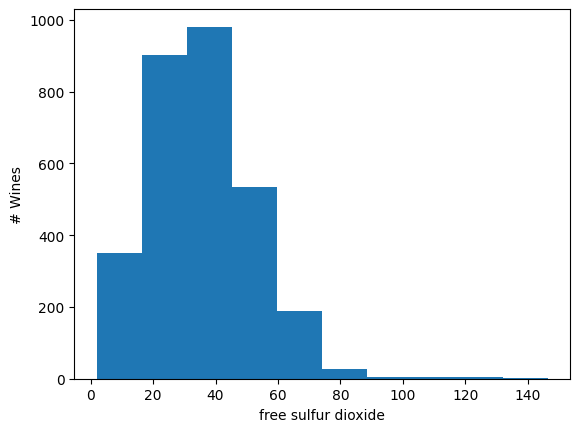

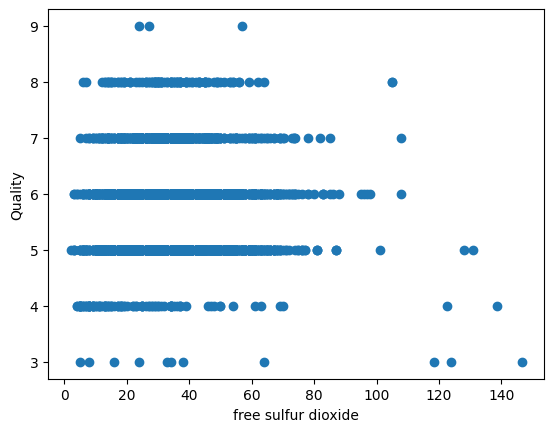

Feature: total sulfur dioxide
Correlation coefficient: -0.18955558921951907


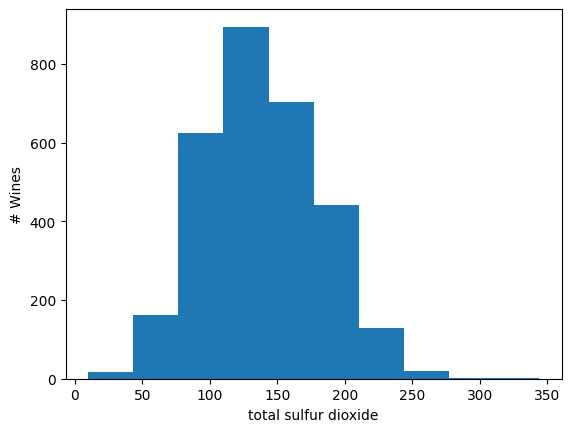

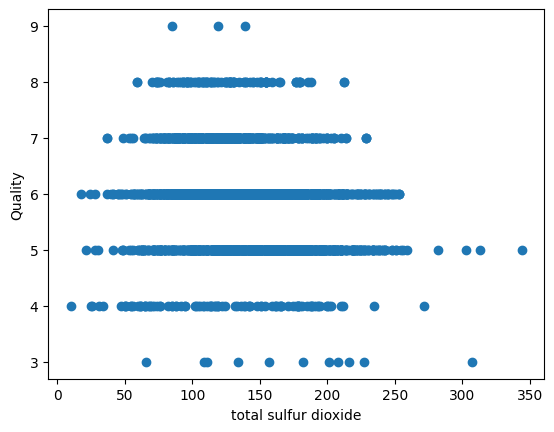

Feature: density
Correlation coefficient: -0.29691661463798796


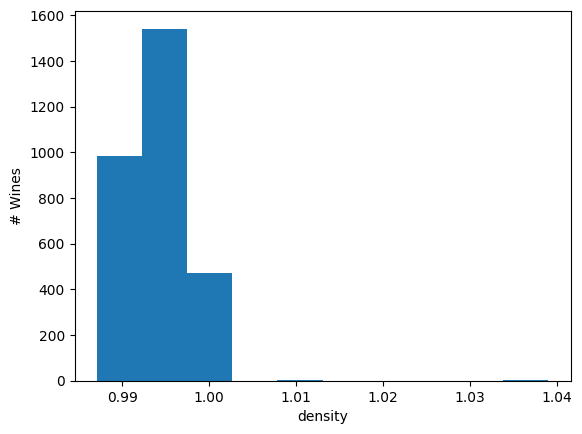

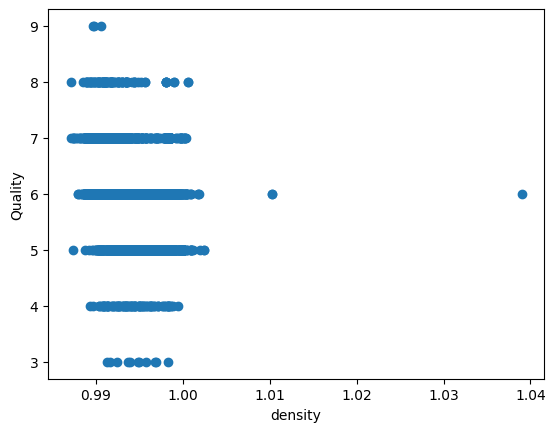

Feature: pH
Correlation coefficient: 0.09278774736284033


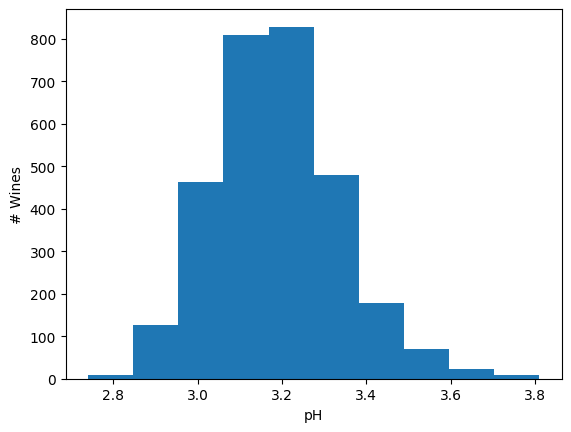

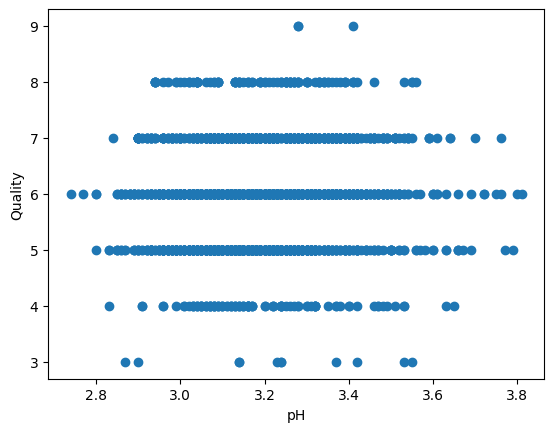

Feature: sulphates
Correlation coefficient: 0.06243412647420805


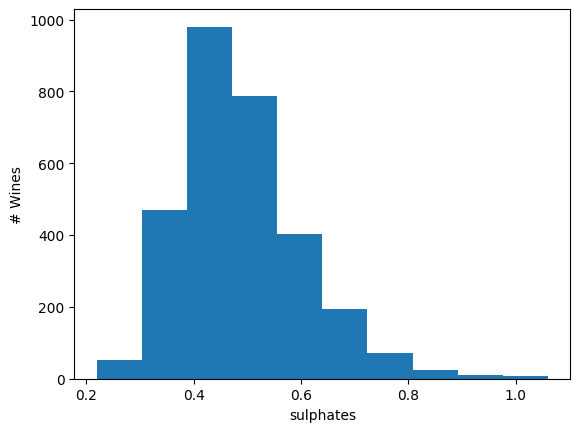

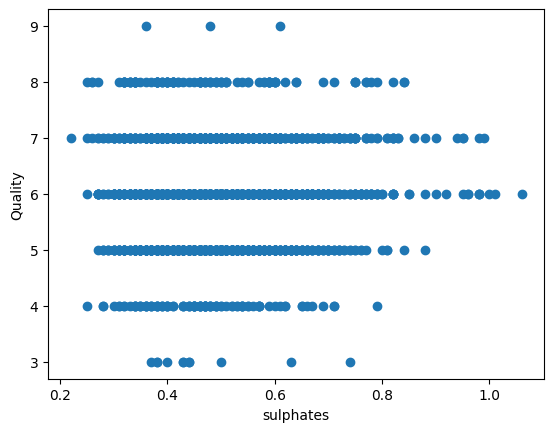

Feature: alcohol
Correlation coefficient: 0.43194884672389044


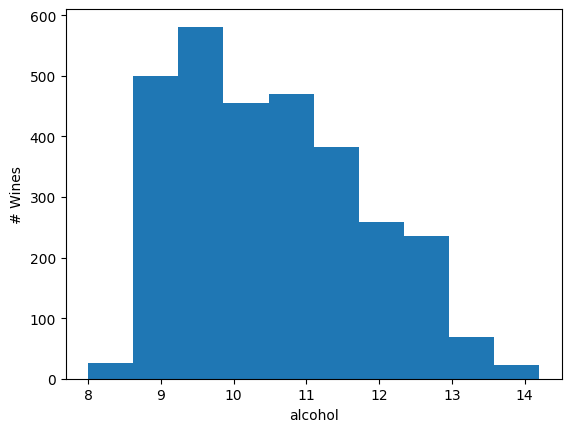

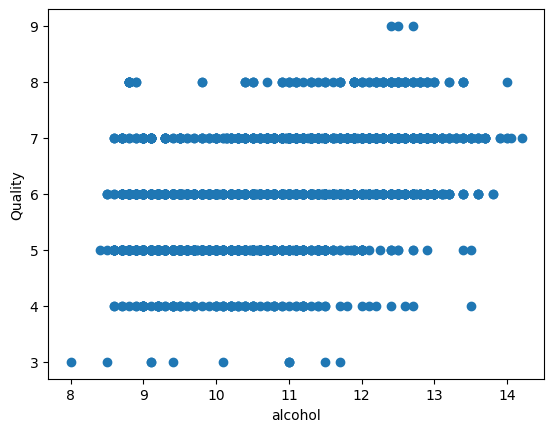

In [18]:
import matplotlib.pyplot as plt

features = ["fixed acidity", "volatile acidity", "citric acid", 
            "residual sugar", "chlorides", "free sulfur dioxide", 
            "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

# Loop over all features
for i_feat, feat in enumerate(features):
    plt.clf()
    print("Feature:", feat)
    print("Correlation coefficient:", 
          np.corrcoef(X_train[:,i_feat],y_train)[0,1]) # Calulate correlation coefficient

    # 1D Histogram 
    plt.hist(X_train[:,i_feat])
    plt.xlabel(feat)
    plt.ylabel("# Wines")
    plt.show()
    
    # Scatter Plot
    plt.scatter(X_train[:,i_feat],y_train)
    plt.xlabel(feat)
    plt.ylabel("Quality")
    plt.show()


Calculate the weights for linear regression. Using ordinary least squares (OLS), one can derive the following  expression:


$$ 
\vec{\bf{w}}= (\bf{X}^T \bf{X})^{-1} \bf{X}^T \vec{\bf{y}}
$$ 

Numpy provides functions for matrix manipulation (https://numpy.org/doc/stable/reference/routines.array-manipulation.html). Here, one can use the following: 

*  **np.matmul** for matrix multiplication
*  **.T** for matrix transposition
*  **np.linalg.inv** for matrix inversion
    

In [19]:
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), X_train.T),y_train)
print(w.shape)
print(w)

(11,)
[-5.03080240e-02 -2.07072880e+00  1.43637220e-01  2.63899202e-02
 -1.43801436e+00  5.05989905e-03 -9.61725721e-04  2.04841973e+00
  1.64101274e-01  5.22595587e-01  3.59781928e-01]


Use the weights to construct a linear model and predict the target variable on the test set. Compare your predictions with the true values of the target variable (ground truth). Calculate the correlation coefficient between predicted and true quality and draw a scatter plot.

(1898, 11) (11,) (1898,)
[7.2000e+00 2.3000e-01 1.9000e-01 1.3700e+01 5.2000e-02 4.7000e+01
 1.9700e+02 9.9865e-01 3.1200e+00 5.3000e-01 9.0000e+00]
[-5.03080240e-02 -2.07072880e+00  1.43637220e-01  2.63899202e-02
 -1.43801436e+00  5.05989905e-03 -9.61725721e-04  2.04841973e+00
  1.64101274e-01  5.22595587e-01  3.59781928e-01]
5.596589477681487
Correlation coefficient: 0.5048144621696729


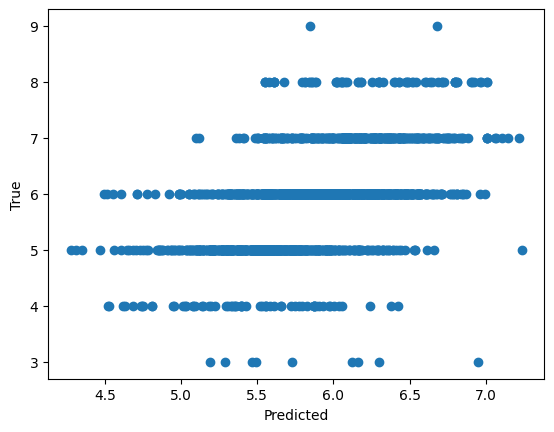

In [20]:
y_pred = np.matmul(X_test,w)
print(X_test.shape,w.shape,y_pred.shape)

print(X_test[0])
print(w)
print(y_pred[0])


print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])

# Prepare scatter plot
plt.scatter(y_pred,y_test)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()